In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



In [17]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

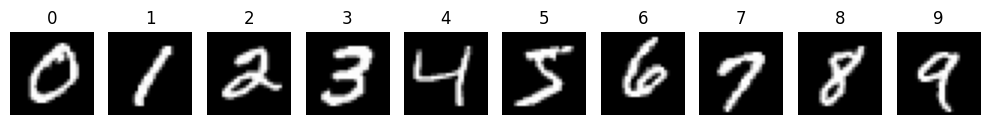

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

# Load dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Create a dictionary to hold one example per digit
digit_images = {}

# Loop through the dataset and find one image for each digit
for i in range(len(x_train)):
    label = y_train[i]
    if label not in digit_images:
        digit_images[label] = x_train[i]
    if len(digit_images) == 10:
        break  # Stop when we have one image for each digit

# Plot the images
plt.figure(figsize=(10, 2))
for digit in range(10):
    plt.subplot(1, 10, digit + 1)
    plt.imshow(digit_images[digit], cmap='gray')
    plt.title(str(digit))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
# Reshape data to include channel dimension and normalize pixel values
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Abdul Samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(x_train, y_train, epochs=7, validation_split=0.1)

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8938 - loss: 0.3499 - val_accuracy: 0.9867 - val_loss: 0.0469
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9887 - val_loss: 0.0439
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9916 - loss: 0.0249 - val_accuracy: 0.9907 - val_loss: 0.0371
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0176 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9907 - val_loss: 0.0354
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9897 - val_loss: 0.0446


In [23]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.0468

Test accuracy: 0.9893


In [24]:

sample_index = 0  # Change this index to test different images
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

In [25]:
prediction = model.predict(sample_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


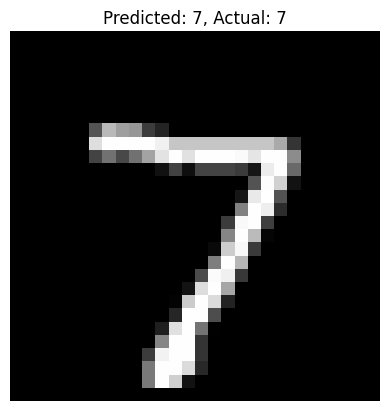

In [26]:
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {sample_label}')
plt.axis('off')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Accuracy:  0.9893


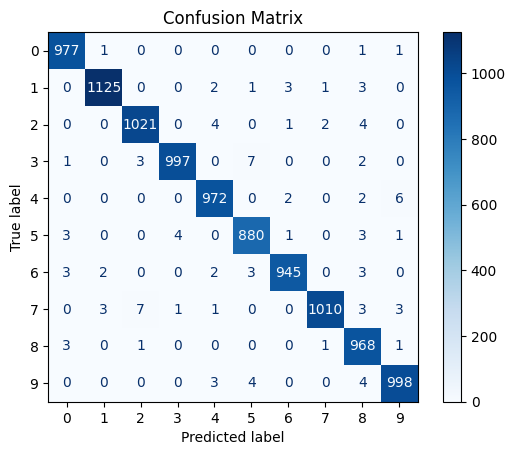

In [27]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict the labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nAccuracy: ", accuracy_score(y_test,y_pred_classes))
# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()


In [28]:
# prediction = np.array(prediction).ravel()

In [29]:
model.save('mnist_cnn.h5')

In [30]:
import tkinter as tk
from tkinter import Canvas, Button, Label, messagebox
from PIL import Image, ImageOps
import numpy as np
from tensorflow.keras.models import load_model
import io

# Load the trained model (train first using previous code)
model = load_model('mnist_cnn.h5')

class DigitRecognizer:
    def __init__(self, master):
        self.master = master
        master.title("Handwritten Digit Recognizer")
        
        # Set up UI components
        self.canvas = Canvas(master, width=280, height=280, bg="white", cursor="cross")
        self.label = Label(master, text="Draw a digit (0-9)", font=("Helvetica", 16))
        self.predict_btn = Button(master, text="Recognize", command=self.predict_digit)
        self.clear_btn = Button(master, text="Clear", command=self.clear_canvas)
        # self.exit_btn = Button(master, text="Exit", command=master.quit)
        self.result_label = Label(master, text="", font=("Helvetica", 24))
        
        # Layout
        self.label.grid(row=0, column=0, pady=5)
        self.canvas.grid(row=1, column=0, padx=10, pady=10)
        self.predict_btn.grid(row=2, column=0, pady=5)
        self.clear_btn.grid(row=3, column=0, pady=5)
        # self.exit_btn.grid(row=4, column=0, pady=5)
        self.result_label.grid(row=5, column=0, pady=10)
        
        # Drawing variables
        self.last_x = None
        self.last_y = None
        self.line_width = 15
        
        # Bind mouse events
        self.canvas.bind("<B1-Motion>", self.draw)
        self.canvas.bind("<ButtonRelease-1>", self.reset_position)
    
    def draw(self, event):
        if self.last_x and self.last_y:
            self.canvas.create_line(
                self.last_x, self.last_y, event.x, event.y,
                width=self.line_width, fill="black", capstyle=tk.ROUND, smooth=True
            )
        self.last_x = event.x
        self.last_y = event.y
    
    def reset_position(self, event):
        self.last_x = None
        self.last_y = None
    
    def clear_canvas(self):
        self.canvas.delete("all")
        self.result_label.config(text="")
    
    def preprocess_image(self):
        # Save canvas as postscript image
        ps = self.canvas.postscript(colormode='mono')
        img = Image.open(io.BytesIO(ps.encode('utf-8')))
        
        # Convert to grayscale and resize
        img = img.resize((28, 28)).convert('L')
        img = ImageOps.invert(img)  # MNIST has white digits on black background
        
        # Convert to numpy array and normalize
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)
        return img_array
    
    def predict_digit(self):
        try:
            # Get processed image
            img_array = self.preprocess_image()
            
            # Make prediction
            prediction = model.predict(img_array)
            digit = np.argmax(prediction)
            confidence = np.max(prediction)
            
            # Display result
            self.result_label.config(text=f"Prediction: {digit}\nAccuracy: {confidence:.2%}")
        except Exception as e:
            messagebox.showerror("Error", f"Prediction failed: {str(e)}")

if __name__== "__main__":
    root = tk.Tk()
    app = DigitRecognizer(root)
    root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
